# Case Study 1: From Exploration to Design

- Name: SAMIHA TASNIM KHHAN
- Student ID: 92816321
- Link to GitHub Repository: 

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [1]:
install.packages('tidyverse')
install.packages("remotes")   # or "devtools"
remotes::install_github("lbelzile/hecedsm", force = TRUE)

library(hecedsm)
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpkRpMrI/remotesdb31d2c5b9/lbelzile-hecedsm-df0a544/DESCRIPTION’ ... OK
* preparing ‘hecedsm’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
  NB: this package now depends on R (>= 4.1.0)
  pipe |> or function shorthand \(...) syntax added in R 4.1.0.
  File(s) using such syntax:
    ‘SKD23_S2A.Rd’
* building ‘hecedsm_2025.06.18.tar.gz’



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Primary Research Questions:**
The authors aimed to determine how different notification and response methods: smartwatch, smartphone, speaker-based voice delivery, and manual texting affect driver distraction. Specifically, they examined whether smartwatches distract drivers more than smartphones, whether voice-based interaction reduces distraction relative to visual-manual interaction, and how these conditions influence visual attention, driving behavior, and cognitive workload in a controlled driving simulator.

**Importance and Relevance:**
These goals are highly relevant to road safety research because distracted driving remains a leading cause of traffic fatalities, while wearable technologies are rapidly becoming more common. Unlike smartphones, smartwatches are not clearly addressed in many traffic laws. Understanding their distraction potential helps inform policymakers, designers of vehicle systems, and the public about safer ways to stay connected while driving.

**Hypotheses and Outcomes Explored:**
The study tested hypotheses that gaze would be less focused on the road when using a smartwatch than a smartphone, less focused with smartphones than with speaker-based messages, and worst when replying by text rather than voice. It also hypothesized similar patterns for driving behavior and mental workload. These hypotheses allowed the authors to compare visual, behavioral, and cognitive effects across interaction modes.

In [2]:
data("BRLS21_EDA")
head(BRLS21_EDA)

id reltime task     occurence eda      hr      
1 1  0       baseline 1         20.60959 88.49560
2 1  1       baseline 1         21.41062 88.31564
3 1  2       baseline 1         22.26244 78.13892
4 1  3       baseline 1         24.22100 65.82009
5 1  4       baseline 1         24.23851 65.13290
6 1  5       baseline 1         23.63703 66.83456

**Types of variables in the dataset**
Based on the dataset preview, the variables include both categorical and numerical types. The id variable is categorical (a factor) identifying participants. The task variable is also categorical, indicating the experimental condition (for example, baseline). The reltime and occurence variables are numerical integers representing time and event counts. The eda (electrodermal activity) and hr (heart rate) variables are numerical and continuous, capturing physiological measurements.

**Need for variable conversion before analysis**
Some variable conversion would be necessary before analysis. The id and task variables are already correctly treated as categorical and should remain factors. The occurence variable, although numeric, may represent discrete events and could be treated as categorical or binary depending on the analysis goals. No transformation is strictly required for eda and hr at the initial stage, though normalization or transformation may be considered later depending on distributional properties.

**Missing values in the dataset**
From the head of the dataset shown, there is no visible evidence of missing values in any of the variables, as all entries are populated. However, this assessment is limited to the preview only. A full dataset check would be required to confirm whether any variable contains missing values or whether any exceed a threshold such as 20 percent missingness.

**Evidence of class imbalance**
Based on the preview alone, there is insufficient evidence to conclude whether class imbalance exists. The task variable shows only the baseline category in the displayed rows, which suggests potential imbalance, but this may simply reflect the ordering of the data. A full frequency count across all observations would be needed to properly assess class imbalance in categorical variables.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 739 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 739 rows containing missing values or values outside the scale range
(`geom_point()`).”


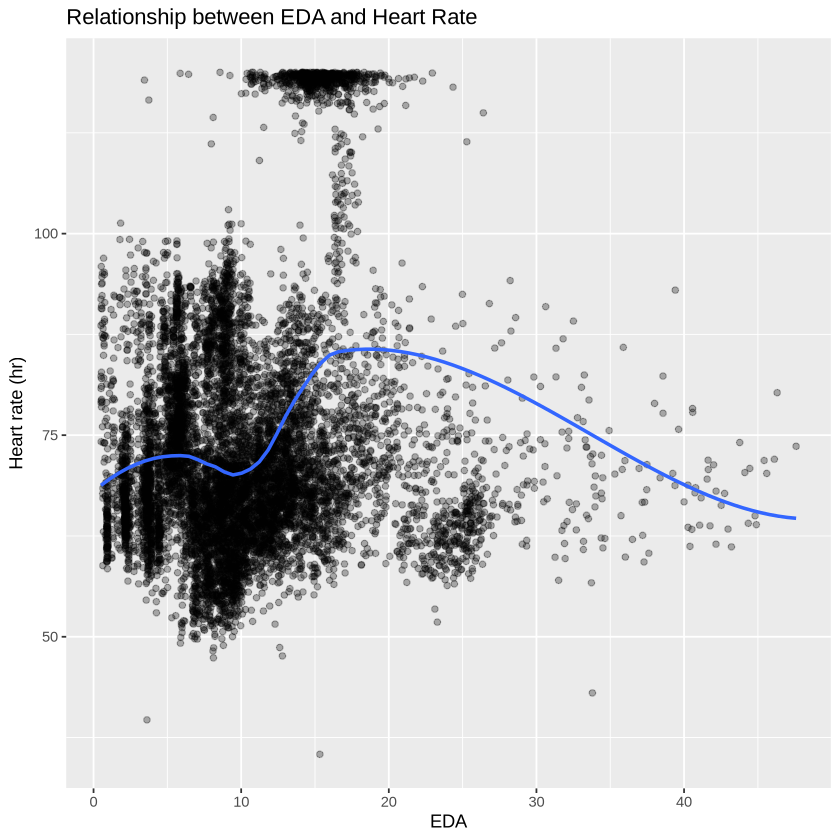

In [3]:
library(dplyr)
library(ggplot2)
BRLS21_EDA %>%
  ggplot(aes(x = eda, y = hr)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", se = FALSE) +
  labs(
    title = "Relationship between EDA and Heart Rate",
    x = "EDA",
    y = "Heart rate (hr)"
  )

This pattern occurs because electrodermal activity and heart rate measure different aspects of physiological response and are not linearly related. At lower to moderate EDA values, increases in arousal can coincide with higher heart rate, which explains the initial upward trend. At higher EDA levels, heart rate does not continue to increase and may level off or decrease, producing the curved shape in the smooth line.

The dense vertical bands are likely caused by how EDA is recorded and processed. EDA sensors often record values in discrete steps or rounded intervals, which results in many observations sharing the same EDA value and forming visible vertical clusters.

The large spread in heart rate for the same EDA value reflects differences across tasks and participants. Heart rate is influenced by factors such as driving condition, individual physiology, and momentary reactions, so EDA alone explains only a small portion of heart rate variation, leading to a noisy and nonlinear relationship.

Warning message:
“Removed 538 rows containing non-finite outside the scale range (`stat_bin()`).”


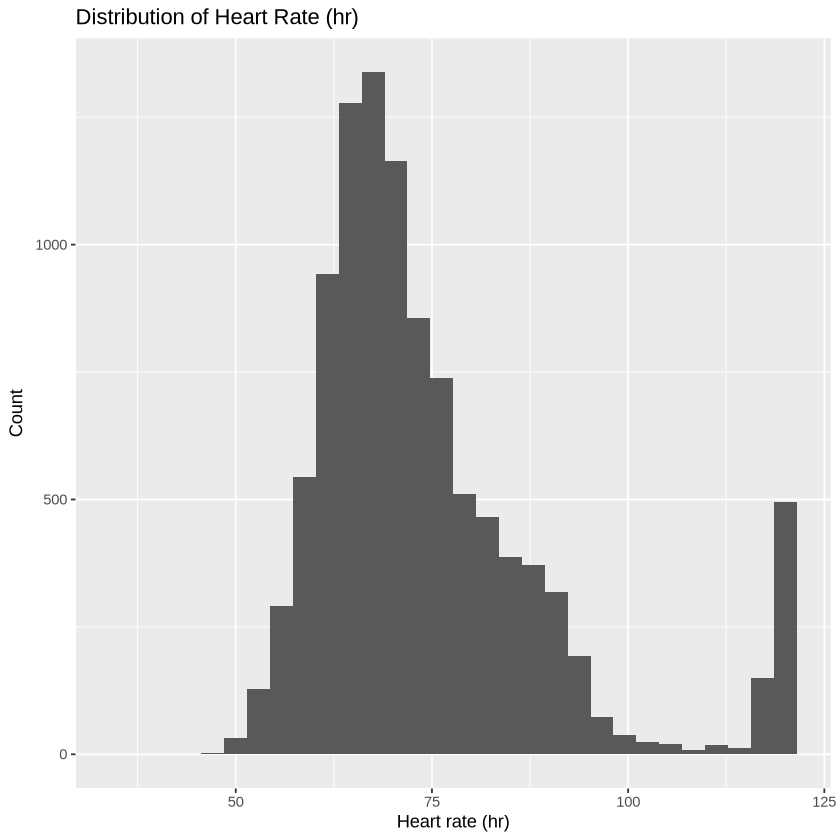

In [4]:
BRLS21_EDA %>%
  ggplot(aes(x = hr)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Distribution of Heart Rate (hr)",
    x = "Heart rate (hr)",
    y = "Count"
  )

The distribution of heart rate is unimodal and right-skewed. Most observations are concentrated between roughly 60 and 80 beats per minute, which likely reflects typical resting or mildly elevated heart rates during the driving tasks. This range represents the most common physiological state of participants during the experiment.

The long right tail indicates occasional periods of elevated heart rate, likely corresponding to moments of increased cognitive demand or stress, such as receiving or responding to notifications while driving. These higher values are less frequent but extend the distribution toward larger heart rates.

A typical observation from this distribution would be a heart rate around the center of the main peak, approximately in the low-to-mid 70s. This suggests that while heart rate varies across conditions and individuals, most measurements cluster around a moderate level rather than extreme values.

Warning message:
“Removed 538 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


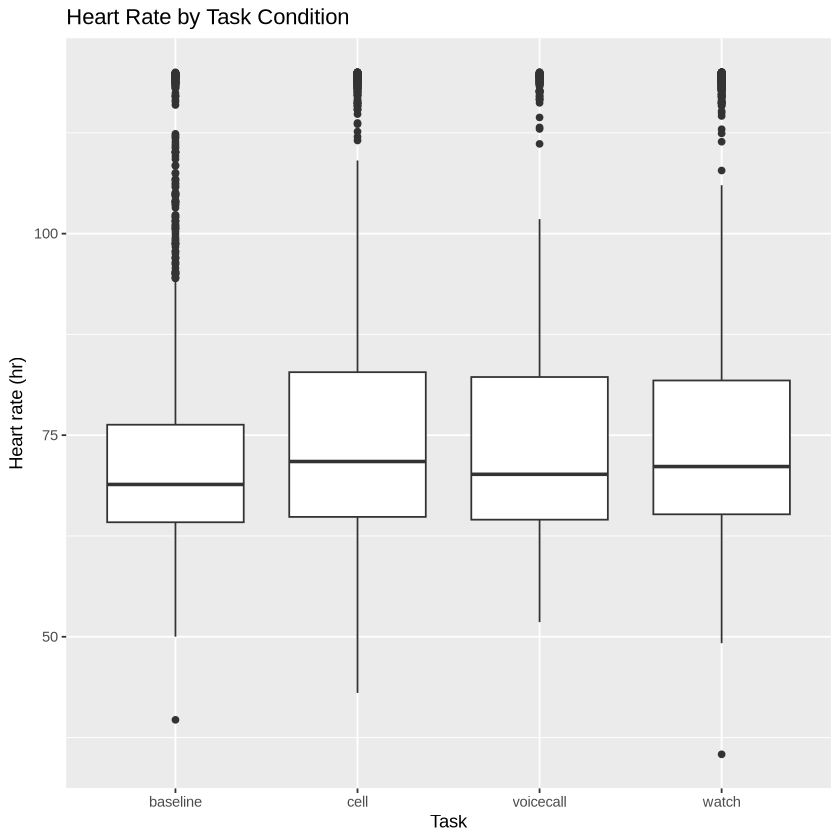

In [5]:
BRLS21_EDA %>%
  ggplot(aes(x = task, y = hr)) +
  geom_boxplot() +
  labs(
    title = "Heart Rate by Task Condition",
    x = "Task",
    y = "Heart rate (hr)"
  )

This plot compares heart rate across different task conditions and shows that the median heart rate is broadly similar across baseline, cell, voicecall, and watch tasks. This suggests that the type of task does not substantially change typical heart rate levels during the experiment.

However, there are small differences in variability. The cell and watch conditions show slightly higher upper ranges and more high-end outliers compared to baseline, indicating occasional periods of elevated heart rate. This may reflect brief increases in physiological arousal when interacting with devices.

Overall, while heart rate does not differ dramatically across tasks, the presence of more extreme values in device-related conditions suggests that certain interactions may trigger short bursts of increased physiological response rather than sustained changes in average heart rate.

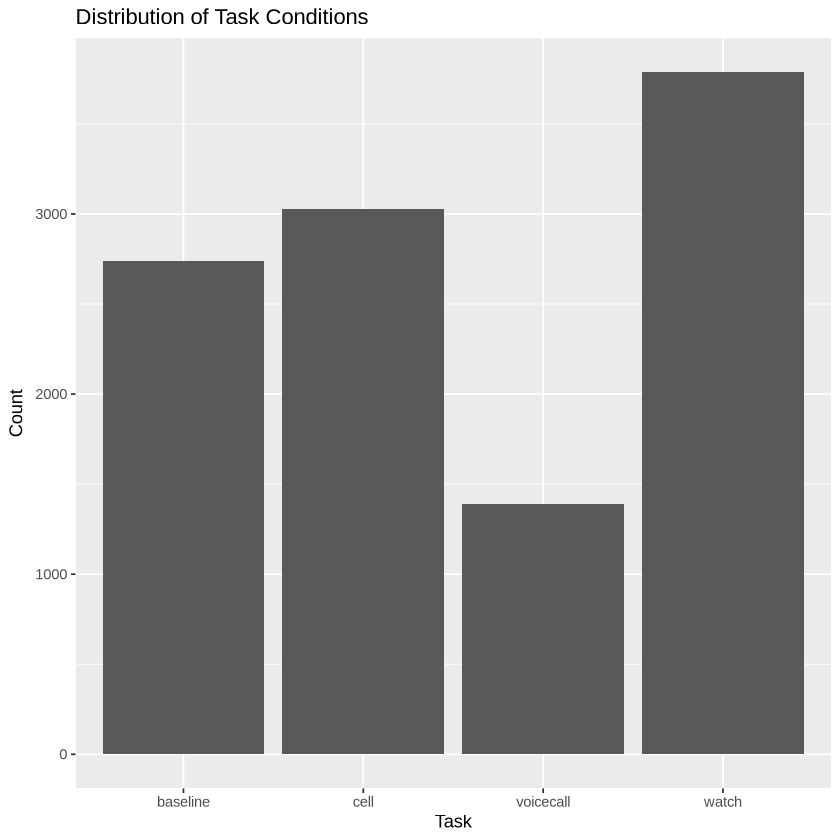

In [6]:
BRLS21_EDA %>%
  ggplot(aes(x = task)) +
  geom_bar() +
  labs(
    title = "Distribution of Task Conditions",
    x = "Task",
    y = "Count"
  )

This bar plot shows the distribution of observations across the four task conditions: baseline, cell, voicecall, and watch. The counts are not perfectly balanced, with the watch condition having the largest number of observations and the voicecall condition having the fewest.

This imbalance likely reflects differences in task duration or the number of usable physiological measurements collected during each condition, rather than differences in the number of participants. Since the data are recorded at a high temporal resolution, longer or more stable tasks naturally generate more observations.

Because task represents experimental conditions rather than an outcome variable, there is no single “typical” value. However, the uneven distribution suggests that analyses comparing tasks should account for differing sample sizes, for example by using summary statistics per participant or condition rather than relying on raw counts alone.

In [7]:
BRLS21_EDA %>%
  summarise(
    median_hr = median(hr, na.rm = TRUE))

median_hr
1 70.47726

The median is an appropriate measure of central tendency for heart rate because the distribution is right-skewed and contains several high-value outliers, as seen in the histogram. The median is robust to extreme values and therefore better represents a typical heart rate during the experiment than the mean, which could be inflated by short periods of elevated heart rate.
A median heart rate of approximately 70.5 beats per minute indicates that half of the heart rate observations in the dataset are below this value and half are above it. This suggests that a typical heart rate during the experiment is around 70 beats per minute, which is consistent with a resting or mildly elevated physiological state while participants were driving.

In [10]:
BRLS21_EDA %>%
  count(task)

task      n   
1 baseline  2736
2 cell      3028
3 voicecall 1392
4 watch     3786

For a categorical variable, counts are the most informative summary statistic because they show how observations are distributed across categories. This is especially important for understanding whether the experimental conditions are balanced or if some tasks contribute more data than others. Knowing the counts helps guide interpretation and ensures fair comparisons across tasks.
This summary shows that observations are not evenly distributed across task conditions. The watch task has the largest number of observations, followed by the cell and baseline tasks, while the voice call task has substantially fewer observations than the others.

In [12]:
BRLS21_EDA %>%
  summarise(
    correlation_eda_hr = cor(eda, hr, use = "complete.obs")
  )


correlation_eda_hr
1 0.1435454

A correlation of 0.14 indicates a weak positive relationship between electrodermal activity and heart rate. This means that, on average, higher EDA values are associated with slightly higher heart rates, but the association is very small. In practical terms, EDA and heart rate tend to increase together only marginally, and there is a large amount of variability. As a result, EDA alone is not a strong predictor of heart rate in this dataset, and other factors such as task condition, individual differences, and moment-to-moment reactions likely play a much larger role.

**Task 5:**
Research question:
If drivers rely more on voice calls rather than smartwatches, can we predict whether their physiological arousal (for example, heart rate or EDA) will be lower during driving?

Need for train-test split:
Yes, a train-test split would be appropriate in this case. Because the goal is to build a model that predicts physiological responses under different task conditions, we need to evaluate how well the model performs on unseen data. Splitting the data into training and testing sets helps prevent overfitting and allows us to assess whether the relationship learned from the data generalizes beyond the sample.
However, because observations are repeated within participants, the split should be done carefully, for example by splitting at the participant level rather than randomly by row.

Feature engineering:
In this scenario, task (voicecall vs watch), time-related variables, and possibly baseline physiological measures could be used as predictors, while heart rate or EDA would be the response variable. A derived feature such as change from baseline would still be very useful, because it removes individual-level differences and allows the model to focus on task-related effects. The predictive model would then estimate whether increased reliance on voice calls is associated with lower predicted physiological arousal compared to smartwatch use.

**Task 6:**

What type of data analysis questions are the authors hoping to answer?

The authors’ goals are primarily inferential and causal in the sense used in DSCI 100: they are comparing outcomes across experimentally assigned conditions to test hypotheses about distraction. They also use descriptive and exploratory analysis to summarize gaze, driving, and workload measures across conditions and to examine patterns before formal comparisons. Their main focus is not predictive modeling, because they are not trying to predict future outcomes for new drivers; instead, they are estimating and comparing the effects of different notification modalities on attention and driving-related measures.

Describe the population and sample used in this study.

The population of interest is licensed drivers who might use smartwatches, smartphones, or voice assistants while driving, particularly adults who drive regularly in real-world contexts. The observed sample was 31 participants aged 18 to 47, recruited through the research panel at HEC Montréal, who completed the simulator tasks under multiple notification conditions. This sample represents a specific subset of drivers (volunteers from one institution’s panel) and may not fully represent all drivers in age, experience, or technology familiarity.

Was this an observational study or a controlled experiment study?

This was a controlled experiment, specifically a within-subject (repeated measures) experimental design. The researchers actively manipulated the independent variable, which was the notification medium and response method (phone, watch, speaker, texting), and measured outcomes such as gaze distribution, driving behavior, and workload. Because each participant experienced multiple conditions and the order was randomized, this design helps control for individual differences and supports stronger conclusions about how the conditions affect the measured outcomes.

**Task 7:**
Any confounding variable in this study?
Yes, the researchers controlled for several potential confounding variables through the study design. They used a within-subject (repeated measures) experimental design, meaning each participant experienced all task conditions. This controls for individual differences such as baseline driving ability, physiological responses, and risk tolerance. The order of task conditions was randomized to reduce confounding from learning effects, fatigue, or adaptation to the driving simulator. Participants were also screened for health conditions, valid driving licenses, and motion sickness, which helps control for medical or legal factors that could influence driving performance or physiological measures. However, prior familiarity with smartwatches or smartphones may still act as a residual confounder.

What type of sampling method did the authors use?
The authors used a convenience sampling method based on voluntary participation. This is described in the Method section under “Sample and procedure,” where they state that participants were recruited through the research panel of their institution and voluntarily registered to take part in the study. This method was likely chosen because it is practical and efficient for a laboratory-based experiment requiring specialized equipment such as a driving simulator and eye-tracking devices. Convenience sampling also allows researchers to carefully screen participants before participation.

Were there any potential sources of sampling bias that may have affected the study’s conclusions?
Yes, there are potential sources of sampling bias. Participants were drawn from a university research panel, which likely overrepresents younger, more educated individuals who are comfortable with technology. Most participants were between 20 and 26 years old, limiting representation of older drivers who may interact differently with smartwatches and smartphones. In addition, participation was voluntary, introducing self-selection bias, as individuals interested in technology or research may differ from the general driving population. These factors may limit the generalizability of the study’s conclusions to all drivers.

**Task 8**
If I were designing this study, I would keep the controlled laboratory experiment structure but adjust both the sampling and the design in a few ways to strengthen generalizability. I would use stratified recruitment to ensure more balanced representation across age groups, driving experience, and smartwatch familiarity. For example, I would aim for roughly even numbers of younger, middle-aged, and older drivers, and include both regular smartwatch users and non-users. This would reduce the risk that results mostly reflect the behavior of younger, tech-comfortable participants. A more diverse sample could change the size of the effects, since older drivers or less experienced smartwatch users might glance longer or interact differently with the devices.

In terms of design, I would still use a within-subject approach because it controls for individual differences and gives higher statistical power with a moderate sample size. However, I would add a true control condition with no notifications to establish a clear baseline for attention and driving behavior. I would also consider a mixed design where some conditions are between-subjects to reduce carryover effects, since repeated exposure might make participants better at managing distractions over time.

The authors likely avoided probability sampling and on-road testing because of practical and ethical constraints. Random sampling is expensive and difficult to implement for lab studies, and real-world driving experiments increase safety risks and reduce experimental control. My proposed approach has limitations too: it would require more time, cost, and recruitment effort, and adding more conditions could increase fatigue and equipment constraints. Even with improved sampling, simulator behavior may still differ from real driving, so there is a tradeoff between realism and control.